<a href="https://colab.research.google.com/github/martinmwarangu/Pyspark_Msc/blob/main/G_008_CN7030_22082024_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning on Big Data (CN7030) CRWK 23-24 Term B [60% weighting]**
# **Group ID: G-008**
1.   Student 1: Anas MAHDAOUI, ID: 2712764
2.   Student 2: Martin Mwangi Mwarangu, ID: 2493079


---

If you want to add comments on your group work, please write it here for us:


# **Initiate and Configure Spark**

In [ ]:
# add your code here
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=6cd93a1bcae2a6a1a11fa1f218f74ae4ed3c4dcc15e9c48b2634c8ee616bca3f
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


**Linking with Spark**

In [ ]:
# Linking with Spark
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
                    .appName("Machine Learning on Big Data (CN7030) CRWK 23-24 Term B") \
                    .master("local[*]") \
                    .config("spark.executor.memory", "4g") \
                    .config("spark.driver.memory", "2g") \
                    .config("spark.executor.cores", "2") \
                    .config("spark.sql.inMemoryColumnarStorage.compressed", "true") \
                    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
                    .getOrCreate()

spark

# **Task 1 Data chosen and Research objectives (10 Marks)**

**1- Dataset description**

Our research has used the dataset from the Kaggle database, which is free to access from the following link: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews.
The dataset includes two tables, as illustrated in Figure 1 below:

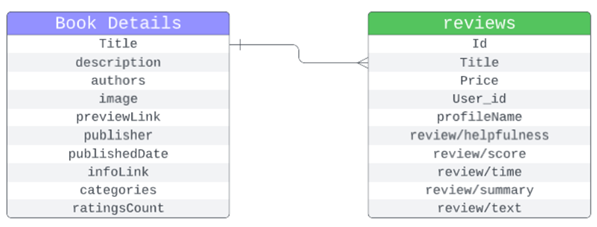

Figure 1: data schema

In total, this dataset was 2.86 GB, which included 2 tables, Book Details with 212,404 rows, and another table with 3,000,000 rows named 'Reviews.'
For our study, we uploaded these two files, Book Details and Reviews, into SQL Server Fig 2 to extract review details.
After extrating  the reviews which containing  all the book details, we will keep only the reviews which the price is mentionned because is one of the important fields in our analysis.

After  running  the script, we now have a dataset with 923 MB, and every row represents the information of the price.

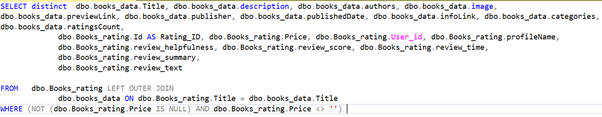

Figure 2: Dataset extraction  

We now have a dataset that includes all the columns previously mentioned. The table below provides a description of the Book Details table.

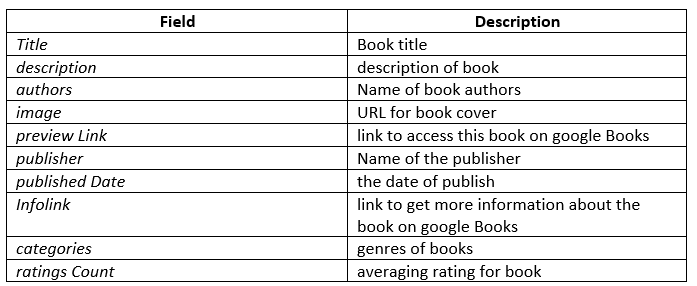

Table 1: Book details

Below a description of the table reviews

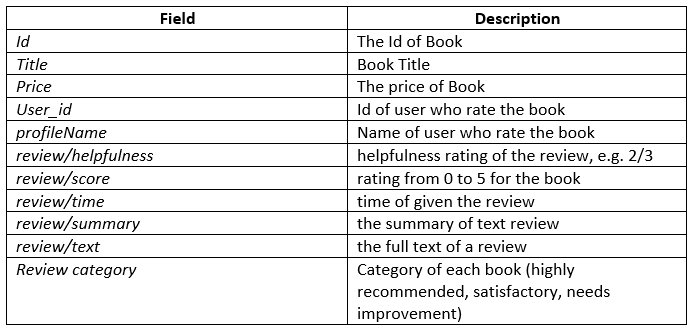

Table 2 : Review


Considering our dataset, which is 923 MB in size and contains a substantial number of rows, it is stored in a CSV file. To extract valuable insights, we need to process this file, which requires significant resources. In our case it seems that Volume, Veracity , Velocity and Value of data makes this situtation a big data problem. Velocity, in particular, is a problem because the time taken to process a dataset of this size on machines with low processing power is appreciable.  


**2- Research Questions**


We would like to open up a bookStore, but since we have a limited budget, we can afford to be very selective about what goes into the shop. That's why
We intend to implemente a  machine learning model  that will help us to decide what books are likely to sell well instead of buying and testing different books, which takes time and need ressources to anlyse the sells.

The features that will be included in our model are:  the price, the publisher, and the author, and other important  details. Using this model, we can predict  the review category  that can help us to determine which books we need to add to our stock.So, What features of a book are most informative in predicting the review category? What are the relationships and interaction effects of these different book features in the prediction of the review category? How well do these features predict the review category for a not clean and imbalanced dataset?


**3-  big data pyspark pipeline**


 To predict the review category of each book, we need to analyse the reviews which are stored in the CSV file using a big data PySpark pipeline.In this project,  we'll start from that CSV file, which contained all information from the Book Details and Reviews tables.We load the dataset into Spark and clean it by handling any missing values. Then, we keep only the important columns which include the important features, and encode categorical values into a usable format.The data now is well prepared so we can plot some figures to analyse our dataset and discover the relations between variables. We will split our data into train, validation and test sets. Then, we are going to create a model for predicting the review category. After training the model, we need to evaluate the model performance in order to improve it using the tunning, after that  we must validate it using the validation set, when the model is validated we will check some metrics, such as accuracy or precision, using test data.



---
# **Task 2 - Data Loading and Preprocessing & Visualisation (15 marks)**
---

**1-Read the dataset using PySpark DataFrame**

**Create PySpark DataFrame from CSV**

****

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Student 1
df = spark.read.format('csv').load("drive/My Drive/Files/Books_Reviews_AMAZON_03.csv", inferSchema = True, header = True)

# show table
df.show(truncate = True)

# show schema
df.printSchema()

# some info
print(df.count())
print(len(df.columns))

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+--------------------+------------+----------+----------------+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+------------------+
|               Title|         description|             authors|               image|         previewLink|           publisher|publishedDate|            infoLink|          categories|ratingsCount| Rating_ID|           Price|       User_id|         profileName|review_helpfulness|review_score|review_time|      review_summary|         review_text|    ReviewCategory|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+--------------------+------------+----------+----------------+--------------+--------------------+--------

**2- Perform necessary preprocessing**

**Drop and keep most important features**









In [ ]:
## Student 1

from pyspark.sql import functions as F

df = df.\
    drop('description').\
    drop('image').\
    drop('previewLink').\
    drop('infoLink').\
    drop('Rating_ID').\
    drop('User_id').\
    drop('profileName').\
    drop('review_helpfulness').\
    drop('review_summary').\
    drop('review_text')
df.show()
df.printSchema()

+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+--------------+------------------+
|               Title|             authors|           publisher|publishedDate|          categories|ratingsCount|Price|review_score|review_time|    ReviewCategory|book_age|ReviewCategory_index|book_age_range|ratingsCount_range|
+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+--------------+------------------+
|"""Come and See""...|['Laurie Watson M...|Emmaus Road Publi...|   2005-01-01|['Christian educa...|           4| 9.65|           5| 1227916800|Highly Recommended|      19|                 0.0|         16-20|               16+|
|"""Cool Stuff"" T...|['Kent Healy' 'Ky...|    Cool Stuff Media|   2005-01-01|       ['Educa

**Tranform data format and create book_age field**


In [ ]:
## Student 1
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, FloatType

df = df.withColumn(
    "publishedDate", F.to_date(F.col("publishedDate"), "yyyy-MM-dd")
).withColumn(
    "book_age", F.year(F.current_date()) - F.year(F.col("publishedDate"))
).withColumn(
    "ratingsCount", F.col("ratingsCount").cast(IntegerType())
).withColumn(
    "Price", F.col("Price").cast(FloatType())
).withColumn(
    "review_score", F.col("review_score").cast(IntegerType())
).withColumn(
    "review_time", F.col("review_time").cast(IntegerType())
)

# Show the transformed DataFrame
df.show()

df.printSchema()

+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+
|               Title|             authors|           publisher|publishedDate|          categories|ratingsCount|Price|review_score|review_time|    ReviewCategory|book_age|
+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+
|"""Come and See""...|['Laurie Watson M...|Emmaus Road Publi...|   2005-01-01|['Christian educa...|        NULL| 9.65|           5| 1227916800|Highly Recommended|      19|
|"""Cool Stuff"" T...|['Kent Healy' 'Ky...|    Cool Stuff Media|   2005-01-01|       ['Education']|        NULL|11.21|           3| 1212796800| Needs Improvement|      19|
|"""Cool Stuff"" T...|['Kent Healy' 'Ky...|    Cool Stuff Media|   2005-01-01|       ['Education']|        NULL|11.21|           3| 13263264

 **Missing values**

In [ ]:
## Student 2
from pyspark.sql.functions import col, sum as _sum

# Define the columns based on the schema provided
columns = ['Title', 'authors', 'publisher', 'categories',
           'ratingsCount', 'Price', 'review_score', 'review_time','book_age']

# Calculate the number of missing values for each of these columns
missing_values = df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in columns])

# Show the result
missing_values.show()

# Calculate total number of rows
total_rows = df.count()
# Calculate the percentage of missing values for each column
missing_percentage = df.select([( (_sum(col(c).isNull().cast("int")) / total_rows) * 100 ).alias(c) for c in columns])

# Show the result
missing_percentage.show()

+-----+-------+---------+----------+------------+-----+------------+-----------+--------+
|Title|authors|publisher|categories|ratingsCount|Price|review_score|review_time|book_age|
+-----+-------+---------+----------+------------+-----+------------+-----------+--------+
|    0|      0|        0|         0|      258429|  200|        1806|          2|   61146|
+-----+-------+---------+----------+------------+-----+------------+-----------+--------+

+-----+-------+---------+----------+-----------------+--------------------+------------------+--------------------+------------------+
|Title|authors|publisher|categories|     ratingsCount|               Price|      review_score|         review_time|          book_age|
+-----+-------+---------+----------+-----------------+--------------------+------------------+--------------------+------------------+
|  0.0|    0.0|      0.0|       0.0|53.17775509700148|0.041154634423382415|0.3716263488431432|4.115463442338241...|12.582206382260708|
+-----+--

**Delete raws where the price, review_score and review_time are null**

In [ ]:
## Student 2
# delete raws where the price, review_score and review_time are null

df = df.dropna(subset=["Price"])
df = df.dropna(subset=["review_score"])
df = df.dropna(subset=["review_time"])


**Encoding review category column**

In [ ]:
## Student 2
from pyspark.ml.feature import StringIndexer
indxer = StringIndexer(inputCols=['ReviewCategory'], outputCols=['ReviewCategory_index'])
df = indxer.fit(df).transform(df)
df.show()

+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+
|               Title|             authors|           publisher|publishedDate|          categories|ratingsCount|Price|review_score|review_time|    ReviewCategory|book_age|ReviewCategory_index|
+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+
|"""Come and See""...|['Laurie Watson M...|Emmaus Road Publi...|   2005-01-01|['Christian educa...|        NULL| 9.65|           5| 1227916800|Highly Recommended|      19|                 0.0|
|"""Cool Stuff"" T...|['Kent Healy' 'Ky...|    Cool Stuff Media|   2005-01-01|       ['Education']|        NULL|11.21|           3| 1212796800| Needs Improvement|      19|                 1.0|
|"""Cool Stuff"" T...|['Kent Healy'

**book_age Distribution**

In [ ]:
## Student 1

from pyspark.sql.functions import when

# Define the ranges
df = df.withColumn(
    "book_age_range",
    when(df["book_age"] <= 5, "0-5")
    .when((df["book_age"] > 5) & (df["book_age"] <= 10), "6-10")
    .when((df["book_age"] > 10) & (df["book_age"] <= 15), "11-15")
    .when((df["book_age"] > 15) & (df["book_age"] <= 20), "16-20")
    .when((df["book_age"] > 20) & (df["book_age"] <= 25), "21-25")
    .otherwise("26+")
)

# Group by the new column and count the number of books in each range
book_age_distribution = df.groupBy("book_age_range").count().orderBy("book_age_range")

book_age_distribution.show()


+--------------+------+
|book_age_range| count|
+--------------+------+
|           0-5| 21017|
|         11-15| 75492|
|         16-20|100338|
|         21-25|102015|
|           26+|137406|
|          6-10| 47898|
+--------------+------+



**Mean book_age**

In [ ]:
## Student 1
from pyspark.sql.functions import mean

# Calculate the mean of 'book_age'
mean_book_age = df.select(mean("book_age")).collect()[0][0]

# Display the mean
print("Mean book age:", mean_book_age)


Mean book age: 20.70870618480249


**Replace missing values on book_age by the mean**

In [ ]:
## Student 1
# Fill missing values in 'book_age' with the mean
df= df.fillna(mean_book_age, subset=['book_age'])
df.show()

+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+--------------+
|               Title|             authors|           publisher|publishedDate|          categories|ratingsCount|Price|review_score|review_time|    ReviewCategory|book_age|ReviewCategory_index|book_age_range|
+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+--------------+
|"""Come and See""...|['Laurie Watson M...|Emmaus Road Publi...|   2005-01-01|['Christian educa...|        NULL| 9.65|           5| 1227916800|Highly Recommended|      19|                 0.0|         16-20|
|"""Cool Stuff"" T...|['Kent Healy' 'Ky...|    Cool Stuff Media|   2005-01-01|       ['Education']|        NULL|11.21|           3| 1212796800| Needs Improvement|      

**Ratingcounts distribution**

In [ ]:
## Student 1
# Distribution of values in ratingsCount

from pyspark.sql.functions import when

# Define the ranges
ranges = [(0, 20), (21, 40), (41, 60), (61, 80), (81, 100),(101, 120),(121, 140),(141, 160),(161, 180),(181, 200), (201, float('inf'))]

# Create a new column with the range labels
df = df.withColumn("ratingsCount_range",
                   when(df["ratingsCount"].between(0, 20), "0-20")
                   .when(df["ratingsCount"].between(21, 40), "21-40")
                   .when(df["ratingsCount"].between(41, 60), "41-60")
                   .when(df["ratingsCount"].between(61, 80), "61-80")
                   .when(df["ratingsCount"].between(81, 100), "81-100")
                   .when(df["ratingsCount"].between(101, 120), "101-120")
                   .when(df["ratingsCount"].between(121, 140), "121-140")
                   .when(df["ratingsCount"].between(141, 160), "141-160")
                   .when(df["ratingsCount"].between(161, 180), "161-180")
                   .when(df["ratingsCount"].between(181, 200), "181-200")
                   .otherwise("201+"))

# Group by the new column and count
distribution = df.groupBy("ratingsCount_range").count()

# Calculate the total count
total_count = df.count()

# Calculate the percentage for each range
distribution_with_percentage = distribution.withColumn(
    "percentage", (col("count") / total_count) * 100
)

# Show the distribution with percentages
distribution_with_percentage.show()




+------------------+------+-------------------+
|ratingsCount_range| count|         percentage|
+------------------+------+-------------------+
|           161-180|  3017| 0.6231333881354743|
|             21-40| 19818|  4.093224224749363|
|              0-20|174119| 35.962665697302164|
|           141-160|   313|0.06464724908399186|
|           181-200|  1158| 0.2391741675375801|
|           121-140|  2644| 0.5460936951376181|
|              201+|264462| 54.622175039139464|
|            81-100|  3501| 0.7230991023739791|
|             61-80|  2504| 0.5171779926719349|
|           101-120|  2805| 0.5793467529731539|
|             41-60|  9825|  2.029262690895272|
+------------------+------+-------------------+



**Reduce the ranges ratingscount distribution**

In [ ]:
## Student 1
# Distribution of values in ratingsCount

from pyspark.sql.functions import when

# Define the ranges
ranges = [(0, 5), (5, 10), (11, 15), (16, 20), (16, float('inf'))]

# Create a new column with the range labels
df = df.withColumn("ratingsCount_range",
                   when(df["ratingsCount"].between(0, 5), "0-5")
                   .when(df["ratingsCount"].between(6, 10), "6-10")
                   .when(df["ratingsCount"].between(11, 15), "11-15")

                   .otherwise("16+"))

# Group by the new column and count
distribution = df.groupBy("ratingsCount_range").count()

# Calculate the total count
total_count = df.count()

# Calculate the percentage for each range
distribution_with_percentage = distribution.withColumn(
    "percentage", (col("count") / total_count) * 100
)

# Show the distribution with percentages
distribution_with_percentage.show()

+------------------+------+------------------+
|ratingsCount_range| count|        percentage|
+------------------+------+------------------+
|              6-10| 29033| 5.996497069187014|
|             11-15| 13907|2.8723619585018363|
|               0-5|123315|25.469570353969505|
|               16+|317911| 65.66157061834164|
+------------------+------+------------------+



**Calculate the median**

In [ ]:
## Student 1
# Median
median_ratingsCount = df.approxQuantile("ratingsCount", [0.5], 0.001)[0]
# Display the median
print("Median ratingsCount:", median_ratingsCount)

Median ratingsCount: 4.0


**Calculate the mean**

In [ ]:
## Student 1
from pyspark.sql.functions import mean

mean_ratingsCount = df.select(mean("ratingsCount")).collect()[0][0]
# Display the mean
print("Mean ratingsCount:", mean_ratingsCount)

Mean ratingsCount: 86.79012758028153


**Replacing ratingsCount missing values with the median**

In [ ]:
## Student 1

# Fill missing values in 'ratingsCount' with the median
df = df.fillna(median_ratingsCount, subset=['ratingsCount'])

# Show the updated DataFrame
df.show()
print("Median ratingsCount:", median_ratingsCount)


+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+--------------+------------------+
|               Title|             authors|           publisher|publishedDate|          categories|ratingsCount|Price|review_score|review_time|    ReviewCategory|book_age|ReviewCategory_index|book_age_range|ratingsCount_range|
+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+--------------+------------------+
|"""Come and See""...|['Laurie Watson M...|Emmaus Road Publi...|   2005-01-01|['Christian educa...|           4| 9.65|           5| 1227916800|Highly Recommended|      19|                 0.0|         16-20|               16+|
|"""Cool Stuff"" T...|['Kent Healy' 'Ky...|    Cool Stuff Media|   2005-01-01|       ['Educa

 **3- EDA: Exploratory Data Analysis**

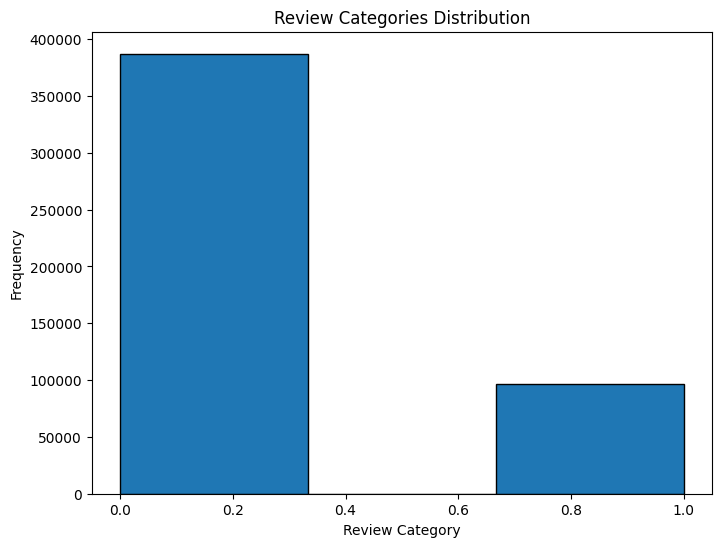

In [ ]:
## Student 2
# prompt: plot a histogram of ReviewCategory  ( number of raws for each ReviewCategory)
import matplotlib.pyplot as plt

# Convert the DataFrame to Pandas for easy plotting
df_pandas = df.select('ReviewCategory_index').toPandas()

# Plotting the distribution of review_score
plt.figure(figsize=(8, 6))
plt.hist(df_pandas['ReviewCategory_index'], bins=3, edgecolor='black')
plt.title('Review Categories Distribution')
plt.xlabel('Review Category')
plt.ylabel('Frequency')
plt.show()



The histgram above shows the distribution of data in our target class review category after encoding the review category class using a string indexer the highly recommended class was given a value of 0 and the needs improvement class given a value of 1. The histogram highlights the imbalance in the dataset with a massive over reperenstation of the highly recommended class in the dataset as compared to the needs improvement class

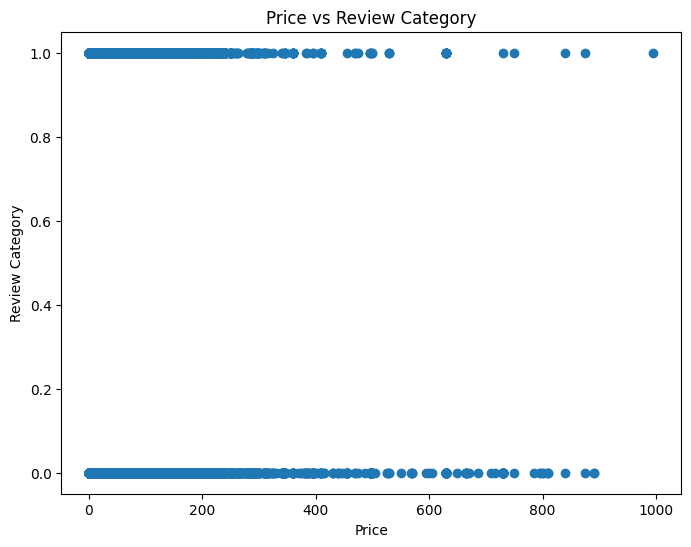

In [ ]:
## Student 2
df_pandas = df.select('Price', 'ReviewCategory_index').toPandas()

# Scatter plot to show the relationship between Price and Review Score
plt.figure(figsize=(8, 6))
plt.scatter(df_pandas['Price'], df_pandas['ReviewCategory_index'], alpha=1)
plt.title('Price vs Review Category')
plt.xlabel('Price')
plt.ylabel('Review Category')
plt.show()

The scatter plot was incoperated to show the distribution of price in our target classes. This was done in order to establish the presence of outliers in the price column in the dataset and whether there is a corelation between the price and our review class. from the plot we can establish Most of the data points are clustered along the y = 0 line, indicating that a majority of the products/services have been categorized into the 0 category (imbalanced data). We can also see a fairly even distribution in the price with most books falling in the lower price categories. The plot therfore suggests that there isn't a clear or strong relationship between price and the review category in the data. For example, both low and high-priced products have been classified into both review categories.

**Heat map**

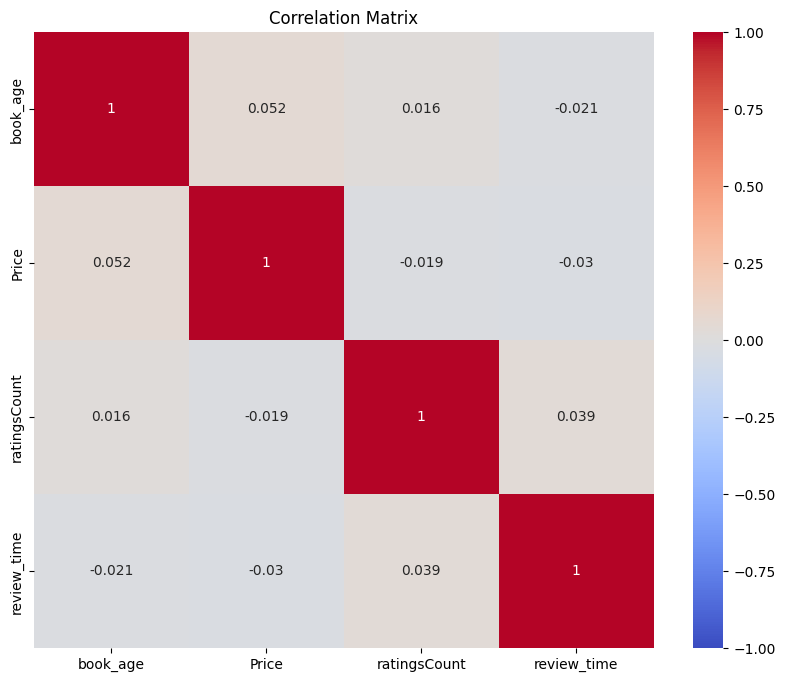

In [ ]:
## Student 2
import seaborn as sns

# Convert the DataFrame to Pandas
df_pandas = df.select('book_age', 'Price', 'ratingsCount', 'review_time').toPandas()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
corr = df_pandas.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The above is a correlation matrix meant to highlight the linear relationships between the columns book_age, Price, ratingsCount and review_time.. The values in a correlation matrix are as follows: 1 indicates a positive correlation between the variables i.e if the value of one goes up the value of the other variable goes up as well, 0 a value of zero indicates no linear relationship exists, and -1 indicates an inverse correlation i.e if the value of one varaible goes up the other one goes down. In our case the matrix shows most of our values have a relationship tending towards zero in both positive and negative directions indicating a very weak linear relationship between the columns. Some of the columns that showed promise were for example book_age vs. Price with a Weak positive correlation (0.052). This suggests a slight tendency for older books to have higher prices, but the relationship is weak and ratingsCount vs. review_time with a weak positive correlation (0.039), suggesting that books with more ratings may have been reviewed at slightly later times, but again, the relationship is extremely weak.

---
# **Task 3 - Model Selection and Implementation (15 marks)**
---


**Vector assembler**

In [ ]:
## Student 2
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['book_age','Price','ratingsCount','review_time'], outputCol='features')
df2 = assembler.transform(df)
df2.show()

+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+--------------+------------------+--------------------+
|               Title|             authors|           publisher|publishedDate|          categories|ratingsCount|Price|review_score|review_time|    ReviewCategory|book_age|ReviewCategory_index|book_age_range|ratingsCount_range|            features|
+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+--------------+------------------+--------------------+
|"""Come and See""...|['Laurie Watson M...|Emmaus Road Publi...|   2005-01-01|['Christian educa...|           4| 9.65|           5| 1227916800|Highly Recommended|      19|                 0.0|         16-20|               16+|[19.0,9.649999618...|
|"""Cool

**Standard scale**

In [ ]:
## Student 2
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
df3 = scaler.fit(df2).transform(df2)
df3.show()

+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+--------------+------------------+--------------------+--------------------+
|               Title|             authors|           publisher|publishedDate|          categories|ratingsCount|Price|review_score|review_time|    ReviewCategory|book_age|ReviewCategory_index|book_age_range|ratingsCount_range|            features|     scaled_features|
+--------------------+--------------------+--------------------+-------------+--------------------+------------+-----+------------+-----------+------------------+--------+--------------------+--------------+------------------+--------------------+--------------------+
|"""Come and See""...|['Laurie Watson M...|Emmaus Road Publi...|   2005-01-01|['Christian educa...|           4| 9.65|           5| 1227916800|Highly Recommended|      19|                 0.0| 

**Split dataset traning, validation and test**





In [ ]:
train, valid,test = df3.randomSplit([0.7, 0.15,0.15], seed=42)

**Implement logistic regression**

In [ ]:
## Student 2
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr1 = LogisticRegression(labelCol="ReviewCategory_index", featuresCol="scaled_features",maxIter=10, regParam=0.3,elasticNetParam=0.8)
model1=lr1.fit(train)
predict_train1=model1.transform(train)
predict_valid1=model1.transform(valid)
predict_test1=model1.transform(test)
predict_test1.select("ReviewCategory_index","prediction").show(10)

+--------------------+----------+
|ReviewCategory_index|prediction|
+--------------------+----------+
|                 0.0|       0.0|
|                 1.0|       0.0|
|                 0.0|       0.0|
|                 0.0|       0.0|
|                 0.0|       0.0|
|                 0.0|       0.0|
|                 0.0|       0.0|
|                 1.0|       0.0|
|                 1.0|       0.0|
|                 0.0|       0.0|
+--------------------+----------+
only showing top 10 rows



In [ ]:
## Student 2

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="ReviewCategory_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predict_train1)
print("Training Accuracy = %g" % (accuracy))




Training Accuracy = 0.799536


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion matrix:
[[271098.      0.]
 [ 67971.      0.]]


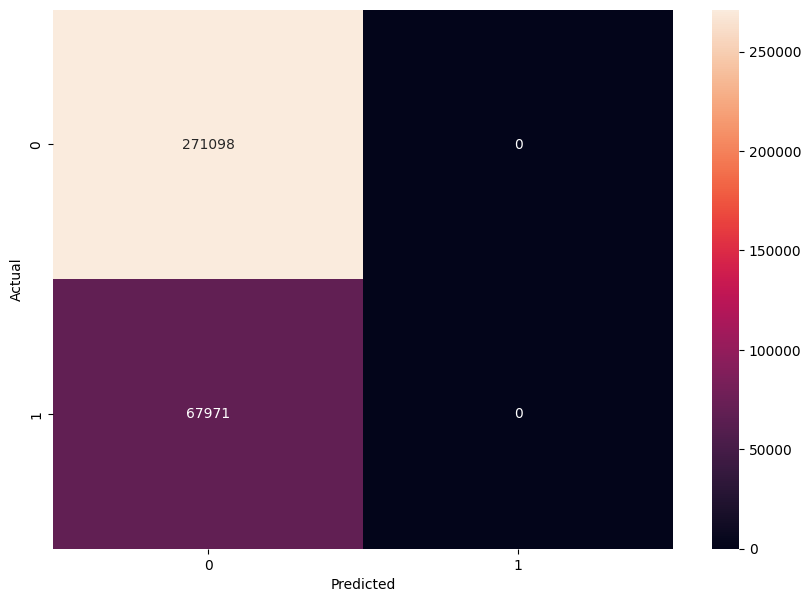

In [ ]:
# Student 2
from pyspark.mllib.evaluation import MulticlassMetrics

# Convert predictions to RDD
predictionAndLabels = predict_train1.select("prediction", "ReviewCategory_index").rdd.map(tuple)

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion matrix
print("Confusion matrix:")
print(metrics.confusionMatrix().toArray())

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusionMatrix().toArray()
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix above shows the results after training the model using the imbalanced dataset a quick glance at the matrix shows that the model has a good accuracy, but is  performing poorly for the **needs improvement (1)** class since it predicts everthing to be in the **highly recommended (0)** class. This observation is backed up by a mathematical analysis of the various metrics as follows:
### **Accuracy**:
Accuracy is the ratio of correctly predicted observations (both true positives and true negatives) to the total observations.
Accuracy = TP + TN/ TP + TN + FP + FN once we substitute the values in our matrix we get an accuracy of 79.93%
### **​Precision:**
Precision is the ratio of correctly predicted positive observations to the total predicted positives.
Precision = TP/TP + FP when we substitute our values we get a precision score of undefined
### **Recall**:
Recall is the ratio of correctly predicted positive observations to all observations in the actual class.
Recall = TP/TP + FN when we substitute our values into the formula we get a recall of 0

**Accuracy** is about 79.93%, which means the model is correct in its predictions about 79.93% of the time. However, this number is heavily influenced by the large number of true negatives(Highly reccomended class).

**Precision** is undefined because the model didn't predict any positive cases (True Positives or False Positives).

**Recall** is 0, indicating that the model failed to identify any of the actual positive cases.

These results backup our earlier observation as the model seems to group everything in the highly reccomended class. This is due to the imbalance in the data and therefore dispite the high degree of accuracy once you dive deeper into the results you find that the model doesn't actually classify the data well

---
# **Task 4 - Model Parameter Tuning (20 marks)**
---


**Balance data using oversampling and undersampling**

**SMOTE (Oversampling the Minority Class)**

In [ ]:
train2, valid2,test2 = df3.randomSplit([0.7, 0.15,0.15], seed=42)

In [ ]:
# Student 1
import numpy as np
import pandas as pd
from pyspark.ml.linalg import Vectors
from pyspark.sql import Row
from imblearn.over_sampling import SMOTE

# Convert the relevant columns to a Pandas DataFrame
pandas_df = train2.select("scaled_features", "ReviewCategory_index").toPandas()

# Extract the values from DenseVectors and flatten them into a single list
pandas_df['scaled_features'] = pandas_df['scaled_features'].apply(lambda x: np.array(x.toArray()))

# Apply SMOTE to balance the data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(np.array(pandas_df['scaled_features'].tolist()), pandas_df["ReviewCategory_index"])

# Combine the resampled features and labels into a DataFrame
resampled_df = pd.DataFrame(X_resampled)
resampled_df['ReviewCategory_index'] = y_resampled

# Ensure that the DataFrame has the correct columns and data
print(resampled_df.head())

# Convert to PySpark DataFrame
def to_dense_vector(row):
    features = Vectors.dense(row[:-1])  # row[:-1] gives all but the last column (features)
    label = int(row[-1])  # Explicitly cast the label to integer
    return Row(scaled_features=features, ReviewCategory_index=label)

# Convert to Dense Vector format and filter out None values
rows = resampled_df.apply(lambda x: to_dense_vector(x.values), axis=1).tolist()

# Create a PySpark DataFrame from the list of Rows
spark_resampled_df = spark.createDataFrame(rows)

# Check the schema of the newly created DataFrame
spark_resampled_df.printSchema()

# Train the logistic regression model
lr2 = LogisticRegression(labelCol="ReviewCategory_index", featuresCol="scaled_features", maxIter=10, regParam=0.001, elasticNetParam=0.0)
model2 = lr2.fit(spark_resampled_df)

# Make predictions
predict_train2 = model2.transform(train2)
predict_valid2=model1.transform(valid2)
predict_test2=model1.transform(test2)

# Evaluate the accuracy on the training set
evaluator = MulticlassClassificationEvaluator(labelCol="ReviewCategory_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predict_train2)
print("Training Accuracy = %g" % (accuracy))


          0         1        2         3  ReviewCategory_index
0  1.467487  2.687865  0.01303  8.241187                   0.0
1  1.276075  0.533595  0.01303  8.343227                   0.0
2  1.276075  1.260355  0.01303  6.713750                   0.0
3  1.276075  1.260355  0.01303  6.725158                   0.0
4  1.212272  0.369118  0.01303  8.725403                   0.0
root
 |-- scaled_features: vector (nullable = true)
 |-- ReviewCategory_index: long (nullable = true)

Training Accuracy = 0.545862


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion matrix:
[[156308. 114790.]
 [ 39194.  28777.]]


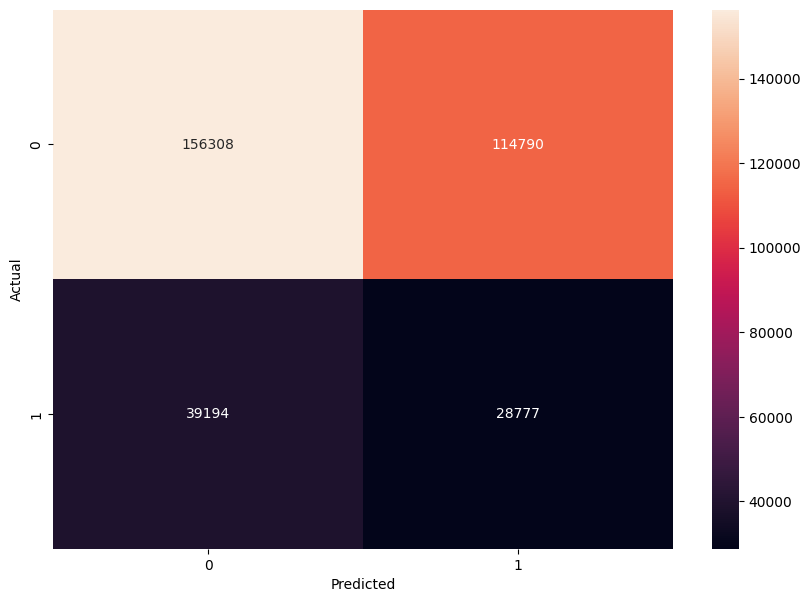

In [ ]:
# Student 1
from pyspark.mllib.evaluation import MulticlassMetrics

# Convert predictions to RDD
predictionAndLabels = predict_train2.select("prediction", "ReviewCategory_index").rdd.map(tuple)

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion matrix
print("Confusion matrix:")
print(metrics.confusionMatrix().toArray())

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusionMatrix().toArray()
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix shows the results after attempting to balance the data by oversampling the minority class. A preliminary analysis shows the model now does better when classifying the needs improvement class The accuracy using oversampling is around 54.58% is below the  accuracy we got using imbalannced data, now the model predict the two classes with a misclassification arround :

* 42% for  highly recommanded class ( class 0 ) (114790/156308+114790)*100
* 57% for needs improvment class ( class 1 )  This can also be shown through the below metrics:

**Accuracy** = TP + TN/ TP + TN + FP + FN once we substitute the values in our matrix we get an accuracy of 54.56% which indicates that the model is correct in its predictions about half of the time. This is a drop compared to when the data was imbalanced , reflecting the challenges introduced by handling class imbalance.


**Precision** = TP/TP + FP when we substitute our values we get a precision score of 20.05% meaning that when the model predicts the positive class (needs improvement), it is correct only about 20.05% of the time. This indicates a high number of false positives.


**Recall** = TP/TP + FN when we substitute our values into the formula we get a recall of 42.33% meaning the model can identify 42.33% of the actual positive cases, which is an improvement from 0% recall in the previous case.

.These results show that after balancing the data the model gets better at identifying the books that should be in the **needs improvement** class however this comes at the cost of increasing false positives, reducing the overall accuracy

**Undersampling the Majority Class**

In [ ]:
# Student 1
# Split the DataFrame into minority and majority classes
minority_class_df = train2.filter(train2["ReviewCategory_index"] == 1)
majority_class_df = train2.filter(train2["ReviewCategory_index"] == 0)

# Sample the majority class down to the size of the minority class
majority_class_sampled_df = majority_class_df.sample(False, fraction=minority_class_df.count() / float(majority_class_df.count()), seed=42)
# combine two dataframes
balanced_train_df = minority_class_df.union(majority_class_sampled_df)

lr2 = LogisticRegression(labelCol="ReviewCategory_index", featuresCol="scaled_features", maxIter=10, regParam=0.001, elasticNetParam=0.0)
model2 = lr2.fit(balanced_train_df)
predict_train2 = model2.transform(train2)
# Evaluate the accuracy on the training set
evaluator = MulticlassClassificationEvaluator(labelCol="ReviewCategory_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predict_train2) # Make sure you are evaluating on predict_train2, not predict_train1
print("Training Accuracy = %g" % (accuracy))


Training Accuracy = 0.546841


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion matrix:
[[155872. 115226.]
 [ 38426.  29545.]]


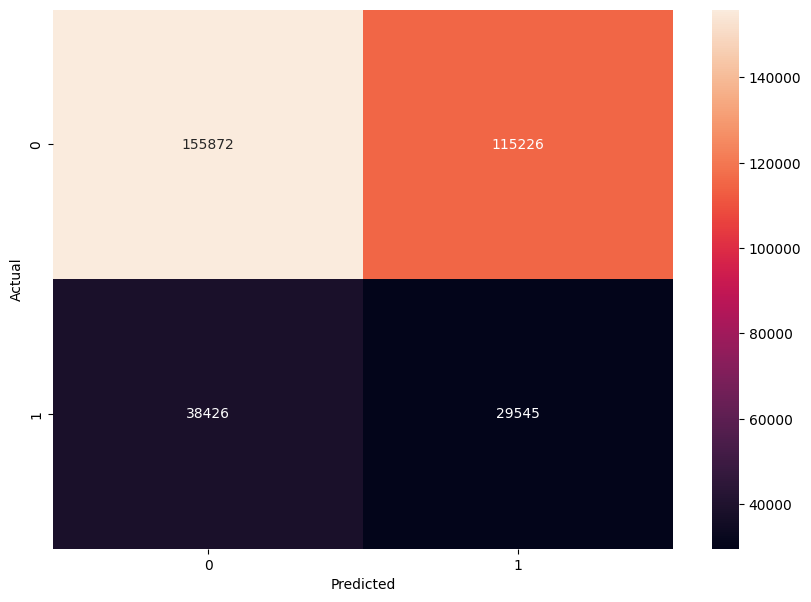

In [ ]:
# Student 1
from pyspark.mllib.evaluation import MulticlassMetrics

# Convert predictions to RDD
predictionAndLabels = predict_train2.select("prediction", "ReviewCategory_index").rdd.map(tuple)

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion matrix
print("Confusion matrix:")
print(metrics.confusionMatrix().toArray())

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusionMatrix().toArray()
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix shows the results after attempting to balance the data by undersampling the majority class. A preliminary analysis shows the model now does slightly better than oversampling the minority class when classifying the needs improvement class.The accuracy using undersampling methhod is about 54.68% which is a little bit improved in comparison with the one found using oversamling , now the model predict the two classes with a misclassification arround :

* 42% for  highly recommanded class ( class 0 ) (155872/155872+115226)*100
* 56% for needs improvment class ( class 1 ) This can also be shown using the metrics below:

**Accuracy** = TP + TN/ TP + TN + FP + FN once we substitute the values in our matrix we get an accuracy of  approximately 54.84%, similar to the previous scenario, suggesting that the model is correct slightly more than half of the time.


**Precision** = TP/TP + FP when we substitute our values we get a precision score of  20.41%, meaning that when the model predicts the positive class, it is correct about 20.41% of the time, which is close to the precision value from when we performed oversampling.


**Recall** = TP/TP + FN when we substitute our values into the formula we get a recall of 43.46%, indicating the model correctly identifies about 43.46% of the actual positive cases, which is a slight improvement over the previous recall of 42.33%.

These results show that undersampling performs slightly better than oversampling
We will use undersampling to balance our data

### **1- Perform hyperparameter tuning for the selected problem**



In [ ]:
# Student 1

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Initialize the Logistic Regression model
lr = LogisticRegression(labelCol="ReviewCategory_index", featuresCol="scaled_features")

# Define a ParamGrid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.001, 0.01, 0.05, 0.1,0.2,0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.3, 0.5, 0.7, 1.0])
             .addGrid(lr.maxIter, [10,50,100])
             .build())

# Define an evaluator, here we use the accuracy metric
evaluator = MulticlassClassificationEvaluator(
    labelCol="ReviewCategory_index", predictionCol="prediction", metricName="accuracy")

# Set up the CrossValidator
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)  # 5-fold cross-validation

# Fit the model using cross-validation
cvModel = crossval.fit(balanced_train_df)


In [ ]:
## Student 1
# Display the best hyperparameters
best_model = cvModel.bestModel
best_params = {
    'regParam': best_model._java_obj.getRegParam(),
    'elasticNetParam': best_model._java_obj.getElasticNetParam(),
    'maxIter': best_model._java_obj.getMaxIter()

}
print("Best hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

###**2- Optimize the model's parameters**

In [ ]:
## Student 2
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize the Logistic Regression model with new para

lr2 = LogisticRegression(labelCol="ReviewCategory_index", featuresCol="scaled_features", maxIter=10, regParam=0.01, elasticNetParam=0.3)
model2 = lr2.fit(balanced_train_df)
predict_train2 = model2.transform(train2)
predict_valid2=model2.transform(valid2)
predict_test2=model2.transform(test2)
# Evaluate the accuracy on the training set
evaluator = MulticlassClassificationEvaluator(labelCol="ReviewCategory_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predict_train2) # Make sure you are evaluating on predict_train2, not predict_train1
print("Training Accuracy = %g" % (accuracy))

Training Accuracy = 0.624433


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion matrix:
[[190553.  80545.]
 [ 46798.  21173.]]


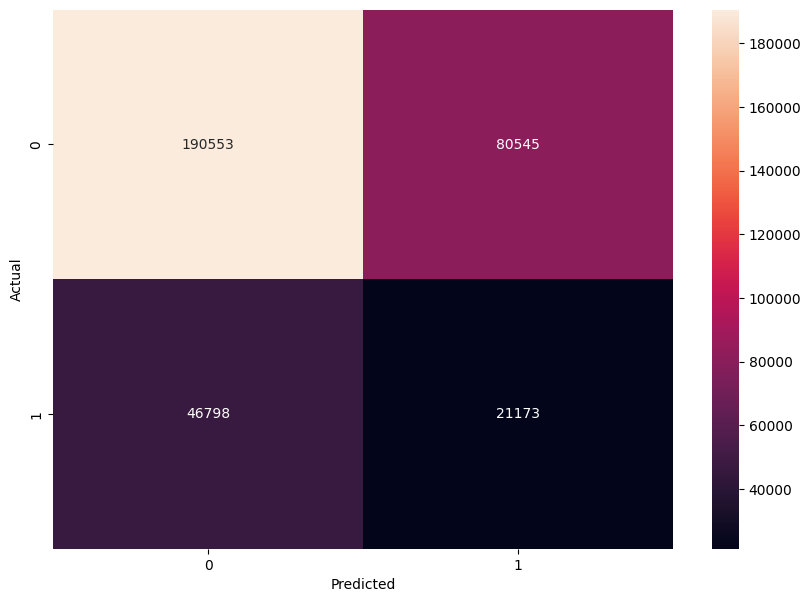

In [ ]:
## Student 2
from pyspark.mllib.evaluation import MulticlassMetrics

# Convert predictions to RDD
predictionAndLabels = predict_train2.select("prediction", "ReviewCategory_index").rdd.map(tuple)

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion matrix
print("Confusion matrix:")
print(metrics.confusionMatrix().toArray())

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusionMatrix().toArray()
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###**3- The impact of the model parameters on accuracy**


**- Accuracy**

Before the tunning the model accuracy was about **54%** that means that we need tunning to improve the accuracy. By analysing the confusion matrix we have a mmisssclafication about **42%**for the **highly recommanded** category and **56%** missclassification for the **needs improvment** category.  we can establish that the model does not classiffy  the reviews well, in other words the model can't predict well the reviews which required hyper parameter tunning. After tunning the accuracy jump to **62%** and the model classify a little bit the reviews, because the missclassification for the categories was reduced from **42%** to **30%** for **highly recommanded** and from **56%** to **32%** for **needs improvment**


---
# **Task 5 - Model Evaluation and Accuracy Calculation (20 marks)**
---

**Validation accuracy**

In [ ]:
## Student 2
# add the code here evaluation
evaluator = MulticlassClassificationEvaluator(labelCol="ReviewCategory_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predict_valid2)
print("Validation Accuracy = %g" % (accuracy))

Validation Accuracy = 0.625404


**Training and validation accuracy curve**

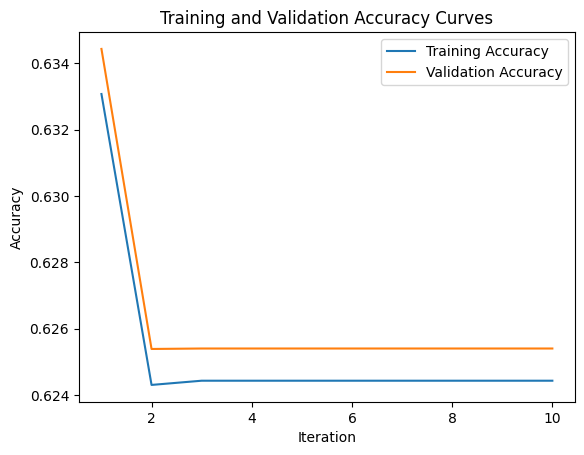

In [ ]:
3## Student 1
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt

# Train the model once with maxIter=10
lr2 = LogisticRegression(labelCol="ReviewCategory_index", featuresCol="scaled_features", maxIter=10, regParam=0.01, elasticNetParam=0.3)
model2 = lr2.fit(balanced_train_df)

# Initialize evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="ReviewCategory_index", predictionCol="prediction", metricName="accuracy")

# Calculate training and validation accuracies for different iterations
training_accuracies = []
validation_accuracies = []

# Get predictions for both training and validation datasets
predict_train2 = model2.transform(train2)
predict_valid2 = model2.transform(valid2)

for i in range(1, 10 + 1):
    # Evaluate using only the first i iterations
    lr_temp = LogisticRegression(labelCol="ReviewCategory_index", featuresCol="scaled_features", maxIter=i, regParam=0.01, elasticNetParam=0.3)
    model_temp = lr_temp.fit(balanced_train_df)

    predict_train_temp = model_temp.transform(train2)
    predict_valid_temp = model_temp.transform(valid2)

    training_accuracy = evaluator.evaluate(predict_train_temp)
    validation_accuracy = evaluator.evaluate(predict_valid_temp)

    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)

# Plot the training and validation accuracy curves
plt.plot(range(1, 10 + 1), training_accuracies, label='Training Accuracy')
plt.plot(range(1, 10 + 1), validation_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.show()


 **LOSS CURVE**

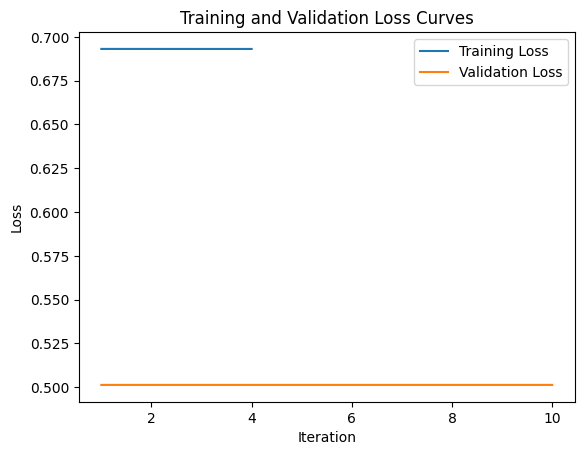

In [ ]:
## Student 2
# Plot loss curve based on this results for training and validation

import matplotlib.pyplot as plt

# Extract training loss from the model's summary
training_summary = model2.summary
objectiveHistory = training_summary.objectiveHistory
training_losses = objectiveHistory

# Calculate validation loss
validation_losses = []
for i in range(1, 10 + 1):
    lr_temp = LogisticRegression(labelCol="ReviewCategory_index", featuresCol="scaled_features", maxIter=i, regParam=0.01, elasticNetParam=0.3)
    model_temp = lr_temp.fit(train2)
    predictions = model_temp.transform(valid2)
    evaluator = MulticlassClassificationEvaluator(labelCol="ReviewCategory_index", predictionCol="prediction", metricName="logLoss")
    validation_loss = evaluator.evaluate(predictions)
    validation_losses.append(validation_loss)

# Plot the loss curves
plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss')
plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Test accuracy**

In [ ]:
# Student 2

evaluator = MulticlassClassificationEvaluator(labelCol="ReviewCategory_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predict_test2)
print("Accuracy = %g" % (accuracy))

Accuracy = 0.626075



**Accuracy analysis**

-	The fact that training, validation, and test accuracies are very close to each other suggests that the model is neither overfitting nor underfitting.
-	The performance indicates that the model is too simple or the data is too complex for the current model. For instance, the data might not have clear patterns, could be noisy, or the target variable might be difficult to predict with the given features

**Next steps:**

-	**Feature Engineering**: Consider whether additional features, feature transformations, or selection could improve the model. (in our case we can add the publisher, the author and the category but we have a lot of missing values)
-	**Model Complexity**: Experiment with more complex models (we tried with random forest but the accuracy was so close to the one obtained using logistic regression)
-	**Data Augmentation**: augmenting the data can allow the model to determine the patterns.


---
# **Task 6 - Results Visualization or Printing (5 marks)**
---

**Confusion matrix**

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion matrix:
[[41041. 17152.]
 [10011.  4439.]]


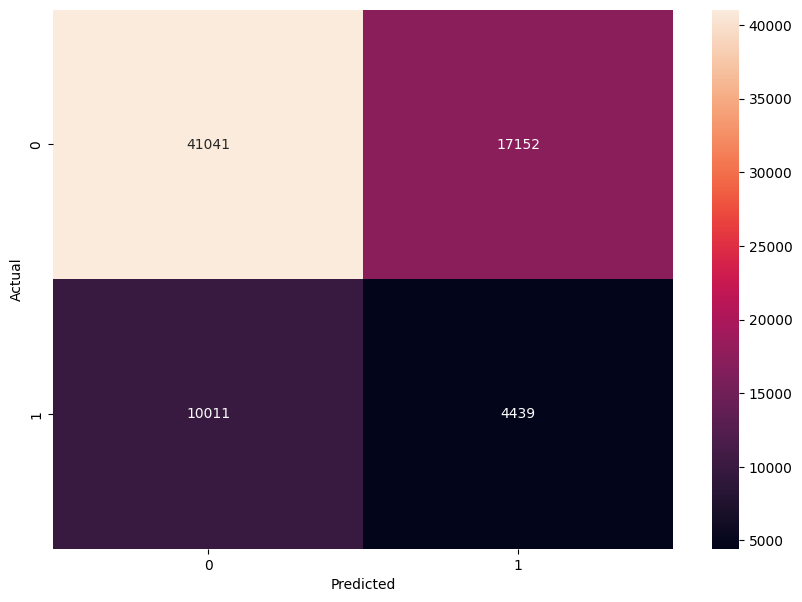

In [ ]:
## Student 1

from pyspark.mllib.evaluation import MulticlassMetrics

# Convert predictions to RDD
predictionAndLabels = predict_test2.select("prediction", "ReviewCategory_index").rdd.map(tuple)

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion matrix
print("Confusion matrix:")
print(metrics.confusionMatrix().toArray())

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusionMatrix().toArray()
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The confusion matrix shows how the model perfoms on the test data

**Accuracy:**

-	Accuracy = 0.62
-	The model correctly classified most of the "highly recommended" cases but had more trouble with "needs improvement."

**Precision:**
-	Precision = 0.20
-	The low precision indicates that the model has a high false positive rate for "needs improvement."

**Recall:**
-	Recall = 0.30
-	The recall is relatively low, indicating that the model misses a significant number of actual "needs improvement" cases.

**Misclassification:**
-	Highly Recommended = 29.47 %
-	Needs Improvement = 69.28%

**Summary:**
-	The model is effective at identifying "highly recommended" cases.
-	The model struggles with "needs improvement" cases, both in terms of precision (high false positives) and recall (high false negatives).


---
# **Task 7 - LSEP Considerations (10 marks)**
---

# 7.1: **LSEP ISSUES**

Since the data used in this work was obtained from a public platform, Kaggle, it was important to ensure that the respective data met all the legal standards in force, especially on privacy and copyright.

# Student 1: **Privacy issue**
While the dataset is public, we have carefully reviewed it with respect to possible personally identifiable information that may cause privacy violations. More specifically, the field user_id is encoded; hence, there is no possibility to identify  who exactly was the user who wrote that review. Also, the profile name will not allow us to learn anything about the user who graded the review. We also did tests to ensure that all potential combinations of the user_id and profile name would not in any way help identify the user. The user_id used in this instance is one that is generated by the Amazon platform itself. The probability that the user_id is used on another platform is very much unlikely. Still, we are going to encrypt the data in our database when this model is deployed.




# Student 2: **Explainability**

Transparency and fairness are important factors to having a trustworthy AI model.Thus the steps taken by a model to make a decision should be easily explainable even to a user without any prior AI knowledge, If people don't understand how decisions are made, they may perceive the AI as a "black box" making arbitrary or biased decisions, leading to a lack of trust in the system.. To achieve this we kept our model simple making use of a binary classification as part of our algorithm whilst also training the model using easy to understand features from the dataset. By implementing these mitigation strategies in developing an explainable model, conducting and others like for example ensuring human oversight, we can address these  concerns, fostering a responsible and trustworthy AI system





# 7.2: **Ethical implications**

# **Bias**
in this section we discuss bias and the impact it might have in the ability of the model to make predictions. We also higlight the steps that can be taken to mitigate these potential biases when they arise

**7.2.1-	Potential Biases in the Data**

**A-Bias in Reviews**

Reviews are subjective by nature and can thus be culturally, socially, or personally biased. If our dataset contains biased reviews, then the model which we build may learn such biases and further reinforce them. For example, if some categories have lower representation or the review for some genres is consistently graded lower due to the demograpics of our reviewers , our trained model could pick up these biases and unfairly categorize future reviews in a prejudiced way.

**B-Training Data Bias**

In case our dataset is not balanced across different review categories, it might bias the model toward the prediction of only classes with higher frequencies. This can make less accurate predictions for the less frequent categories, hence misrepresenting review diversity.

**C-Impact of Bias**

 In our case the model will be used by other platforms to categorize and display reviews, biased predictions could influence purchasers perceptions, potentially disadvantaging certain books  authors or publishers. This could lead to unequal visibility and opportunities for different categories or genres

**7.2.2-Mitigation strategies**

**A- Mitigating Bias in Reviews**

1. Making sure that our dataset contains a diverse set of reviews representing vast cultural, social, and personal contexts. This will enable the model to learn from different points of view and fairly group such reviews.

2. Bias detection tools can detect and quantify biases in the textual review columns . We can use these tools to find out what patterns are responsible for biased predictions of the model and fix them before actually training the model.



**B- Mitigating Training Data Bias**

This was the biggest challenge when it came to our dataset as one category(highly recommended) was vastly over represented comapred to the other (needs improvement) to mitagate this we undertook the steps listed below
1. Active balancing of the dataset to make sure that in the training process, all review categories will be equally represented. This can be done by oversampling underrepresented categories or undersampling overrepresented ones we went with undersampling.
2. Applied reweighting techniques during model training to apply more importance to underrepresented categories. Otherwise, it makes sure that the model pays the due level of attention to less frequent categories, avoiding biased predictions.

As an alternative method we also suggest creating synthetic data  for those classes that are grossly underepresented through methods such as data augmentation. This would help in creating a more balanced training dataset and mitigate training bias.


**C- Mitigating the Impact of Bias**

 After training and generating the predictions from the model, we can review the results and if we still detect biases in our model we can take the following steps:
1. include post-processing steps to adjust for the biases detected. For example, if some genres or categories are persistently rated lower, we need to recalibrate the model's prediction for this bias.

2. Include human reviewers in the loop with categories that might be most biased. Allow users to give feedback on the model's predictions, and use such feedback to iteratively improve the model.


3. Be open about the model's inner functioning to make users aware of the biases that it may hold. This helps to interpret the predictions with an understanding of possible limitations this will improve the user experience and overall make the model more trustworthy.


# **Report HTML template (5 marks)**
Your final report must follow the “The format of final submission” section.
Your
work must demonstrate an appropriate understanding of building a user-friendly,
efficient, and comprehensive analytics report for a big data project to help move
users (readers) around to find the relevant content.

In [ ]:
# install nbconvert
!pip3 install nbconvert

In [ ]:
# Convert the notebook to HTML using the full path
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/G-008_CN7030_22082024.ipynb"



[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/G-008_CN7030.ipynb to html
[NbConvertApp] Writing 1362117 bytes to /content/drive/MyDrive/Colab Notebooks/G-008_CN7030.html
